In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

**transforming data**

**mathematical operation**

In [2]:
df = pd.DataFrame(np.ones([5,4]), columns= ['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


In [3]:
df*2
#to update dataframe

df *= 2
df

,a,b,c,d
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0


In [4]:
df.loc[1] /=2

In [5]:
df['b'] -=1
df

,a,b,c,d
0,2.0,1.0,2.0,2.0
1,1.0,0.0,1.0,1.0
2,2.0,1.0,2.0,2.0
3,2.0,1.0,2.0,2.0
4,2.0,1.0,2.0,2.0


In [6]:
df2 = pd.DataFrame(np.ones([3,2]), columns= ['d','e'], index=[2,4,5])
df2

,d,e
2,1.0,1.0
4,1.0,1.0
5,1.0,1.0


In [7]:
df + df2 #cartesian product

,a,b,c,d,e
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,3.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,3.0,NaN
5,NaN,NaN,NaN,NaN,NaN


In [8]:
df.mean()

a    1.8
b    0.8
c    1.8
d    1.8
dtype: float64

In [9]:
df-df.mean()

,a,b,c,d
0,0.2,0.2,0.2,0.2
1,-0.8,-0.8,-0.8,-0.8
2,0.2,0.2,0.2,0.2
3,0.2,0.2,0.2,0.2
4,0.2,0.2,0.2,0.2


In [10]:
df.sub(df.mean(axis=1), axis= 0)

,a,b,c,d
0,0.25,-0.75,0.25,0.25
1,0.25,-0.75,0.25,0.25
2,0.25,-0.75,0.25,0.25
3,0.25,-0.75,0.25,0.25
4,0.25,-0.75,0.25,0.25


**function application**

In [11]:
df = pd.DataFrame({'sin':np.arange(0, 5*np.pi, 0.01),
                   'cos': np.arange(0.5*np.pi, 5.5*np.pi, 0.01)})
df

,sin,cos
0,0.00,1.570796
1,0.01,1.580796
2,0.02,1.590796
3,0.03,1.600796
4,0.04,1.610796
...,...,...
1566,15.66,17.230796
1567,15.67,17.240796
1568,15.68,17.250796
1569,15.69,17.260796


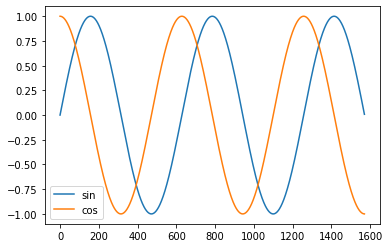

In [12]:
df = np.sin(df)
df.plot()

In [13]:
def iqr(col): #inter-quartile range
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    return q3-q1

df.apply(iqr) #works for rows or cols

sin    1.347237
cos    1.413649
dtype: float64

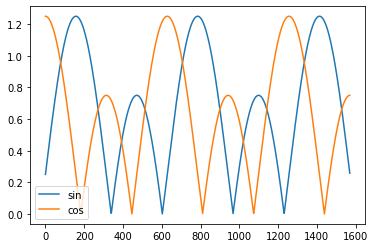

In [14]:
def func(x):
    return np.abs(x+.25)

df.applymap(func).plot()

**grouping and aggregation**

In [15]:
ath = pd.read_csv('datasets/athletes.csv')
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11538 non-null  int64  
 1   name           11538 non-null  object 
 2   nationality    11538 non-null  object 
 3   sex            11538 non-null  object 
 4   date_of_birth  11538 non-null  object 
 5   height         11208 non-null  float64
 6   weight         10879 non-null  float64
 7   sport          11538 non-null  object 
 8   gold           11538 non-null  int64  
 9   silver         11538 non-null  int64  
 10  bronze         11538 non-null  int64  
 11  info           131 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


In [16]:
g = ath.groupby("nationality")
g.sum()

,id,height,weight,gold,silver,bronze
nationality,,,,,,
AFG,544720346,5.21,222.0,0,0,0
ALB,3224936557,10.57,404.0,0,0,0
ALG,34523048655,119.43,4219.0,0,2,0
AND,3059131853,8.56,320.0,0,0,0
ANG,10511499494,45.82,1907.0,0,0,0
...,...,...,...,...,...,...
VIE,10541691287,38.27,1360.0,1,1,0
VIN,2891918513,3.51,120.0,0,0,0
YEM,2482979326,5.09,194.0,0,0,0


In [17]:
g = ath.groupby("nationality")[['gold', 'silver', 'bronze']]
g.sum()

,gold,silver,bronze
nationality,,,
AFG,0,0,0
ALB,0,0,0
ALG,0,2,0
AND,0,0,0
ANG,0,0,0
...,...,...,...
VIE,1,1,0
VIN,0,0,0
YEM,0,0,0


In [18]:
gr = ath.groupby(['sport', 'sex'])[['weight', 'height']]
gr.mean()

weight    height
sport             sex                         
aquatics          female   62.284483  1.715712
                  male     82.219061  1.860342
archery           female   64.301587  1.676190
                  male     80.079365  1.795714
athletics         female   60.152542  1.690500
                  male     74.777680  1.809234
badminton         female   61.209877  1.686000
                  male     76.156627  1.805059
basketball        female   75.377622  1.833819
                  male    100.297872  2.003611
boxing            female         NaN  1.682222
                  male           NaN  1.757615
canoe             female   66.457944  1.700648
                  male     82.150000  1.820455
cycling           female   60.207254  1.673128
                  male     72.576052  1.793074
equestrian        female   58.634146  1.682530
                  male     72.954887  1.790000
fencing           female   62.733871  1.712581
                  male     78.785124  1.833802
football          female   61.061069  1.682710
                  male     74.451713  1.793746
golf              female   63.200000  1.691404
                  male     79.000000  1.793500
gymnastics        female   49.555024  1.616524
                  male     63.254545  1.677105
handball          female   70.789157  1.759722
                  male     95.431694  1.913169
hockey            female   60.425926  1.667870
                  male     77.375000  1.800093
judo              female   65.392157  1.665132
                  male     84.616740  1.781783
modern pentathlon female   58.000000  1.699444
                  male     73.916667  1.825278
rowing            female   69.776190  1.773286
                  male     86.504615  1.898708
rugby sevens      female   66.595890  1.678552
                  male     90.450331  1.829145
sailing           female   63.194969  1.692767
                  male     77.122066  1.812770
shooting          female   62.675676  1.648400
                  male     81.068966  1.780343
table tennis      female   57.530120  1.653659
                  male     72.558140  1.786860
taekwondo         female   61.258065  1.730159
                  male     74.809524  1.863750
tennis            female   64.670455  1.734205
                  male     80.417476  1.860388
triathlon         female   54.563636  1.676545
                  male     66.814815  1.788704
volleyball        female   70.684211  1.828691
                  male     89.421875  1.964010
weightlifting     female   68.788462  1.603558
                  male     87.538961  1.709221
wrestling         female   61.805310  1.651239
                  male     85.372881  1.757215

**Structural Transformation**

In [19]:
m = pd.read_csv('datasets/monthly_data.csv')
m

,YYYY,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
0,2008,10140,10239,10050,10111,10159,10159,10141,10117,10178,10148,10125,10182,10146
1,2009,10137,10140,10140,10141,10188,10168,10128,10165,10208,10166,10041,10068,10141
2,2010,10151,10034,10168,10194,10158,10166,10158,10129,10147,10135,10057,10133,10136
3,2011,10182,10161,10227,10192,10182,10154,10123,10130,10149,10182,10194,10099,10165
4,2012,10194,10286,10271,10053,10159,10127,10139,10155,10149,10109,10108,10085,10153
5,2013,10142,10169,10099,10155,10113,10180,10201,10176,10151,10129,10155,10170,10153
6,2014,10055,10031,10164,10148,10154,10184,10143,10117,10189,10142,10103,10172,10134
7,2015,10135,10164,10198,10214,10152,10195,10142,10152,10171,10186,10150,10217,10173
8,2016,10100,10099,10144,10122,10140,10137,10168,10183,10177,10214,10144,10283,10159
9,2017,10228,10151,10154,10211,10170,10134,10141,10162,10135,10176,10141,10120,10160


In [20]:
m.set_index('YYYY', inplace= True)

In [21]:
#rows into single col

m.stack()
#multi-level indexing

YYYY      
2008  JAN     10140
      FEB     10239
      MAR     10050
      APR     10111
      MAY     10159
              ...  
2017  SEP     10135
      OCT     10176
      NOV     10141
      DEC     10120
      YEAR    10160
Length: 130, dtype: int64

In [22]:
m.stack().sum()

1319751

In [25]:
w = ath.groupby(['sport', 'sex'])['weight'].mean()
w

sport              sex   
aquatics           female     62.284483
                   male       82.219061
archery            female     64.301587
                   male       80.079365
athletics          female     60.152542
                   male       74.777680
badminton          female     61.209877
                   male       76.156627
basketball         female     75.377622
                   male      100.297872
boxing             female           NaN
                   male             NaN
canoe              female     66.457944
                   male       82.150000
cycling            female     60.207254
                   male       72.576052
equestrian         female     58.634146
                   male       72.954887
fencing            female     62.733871
                   male       78.785124
football           female     61.061069
                   male       74.451713
golf               female     63.200000
                   male       79.000000
gymnastics    

In [26]:
w.unstack()

sex,female,male
sport,,
aquatics,62.284483,82.219061
archery,64.301587,80.079365
athletics,60.152542,74.777680
badminton,61.209877,76.156627
basketball,75.377622,100.297872
boxing,NaN,NaN
canoe,66.457944,82.150000
cycling,60.207254,72.576052
equestrian,58.634146,72.954887


In [28]:
p = pd.DataFrame({'id': [823905, 823905,
                         235897, 235897, 235897,
                         983422, 983422],
                  'item': ['prize', 'unit', 
                           'prize', 'unit', 'stock', 
                           'prize', 'stock'],
                  'value': [3.49, 'kg',
                            12.89, 'l', 50,
                            0.49, 4]})
p

,id,item,value
0,823905,prize,3.49
1,823905,unit,kg
2,235897,prize,12.89
3,235897,unit,l
4,235897,stock,50
5,983422,prize,0.49
6,983422,stock,4


In [31]:
#pivot transform cols to rows

p = p.pivot('id', 'item', 'value') #row index; col names; values

In [32]:
p

item,prize,stock,unit
id,,,
235897,12.89,50,l
823905,3.49,NaN,kg
983422,0.49,4,NaN


In [33]:
p.melt()

,item,value
0,prize,12.89
1,prize,3.49
2,prize,0.49
3,stock,50
4,stock,NaN
5,stock,4
6,unit,l
7,unit,kg
8,unit,NaN


In [38]:
#p.melt(id_vars= ['id'])

**combining datasets**

In [39]:
grades = pd.DataFrame([[6, 4, 5], [7, 8, 7], [6, 7, 9], [6, 5, 5], [5, 2, 7]], 
                       index = ['Mary', 'John', 'Ann', 'Pete', 'Laura'],
                       columns = ['test_1', 'test_2', 'test_3'])
grades

,test_1,test_2,test_3
Mary,6,4,5
John,7,8,7
Ann,6,7,9
Pete,6,5,5
Laura,5,2,7


In [40]:
#adding new col

grades['test_4'] = pd.Series({'John': 5, 'Ann': 8, 'Pete': 9, 'Mary': 7, 'Laura': 10})
grades

,test_1,test_2,test_3,test_4
Mary,6,4,5,7
John,7,8,7,5
Ann,6,7,9,8
Pete,6,5,5,9
Laura,5,2,7,10


In [41]:
# Adding new row
grades.loc['Bob'] = [2,3,4,5]
grades

,test_1,test_2,test_3,test_4
Mary,6,4,5,7
John,7,8,7,5
Ann,6,7,9,8
Pete,6,5,5,9
Laura,5,2,7,10
Bob,2,3,4,5


In [42]:
#using append to add row

new_row = pd.Series({'test_1': 5, 'test_2': 6, 'test_3': 7, 'test_4': 8}, name="Kim")
grades.append(new_row)

,test_1,test_2,test_3,test_4
Mary,6,4,5,7
John,7,8,7,5
Ann,6,7,9,8
Pete,6,5,5,9
Laura,5,2,7,10
Bob,2,3,4,5
Kim,5,6,7,8


In [43]:
grades['stud_nr'] = [113, 121, 123, 135, 139, 141]
grades = grades[['stud_nr', 'test_1', 'test_2', 'test_3', 'test_4']]
grades

,stud_nr,test_1,test_2,test_3,test_4
Mary,113,6,4,5,7
John,121,7,8,7,5
Ann,123,6,7,9,8
Pete,135,6,5,5,9
Laura,139,5,2,7,10
Bob,141,2,3,4,5


In [44]:
other = pd.DataFrame([[139, 7, 7],
                       [123, 8, 6],
                       [142, 4, 5],
                       [113, 7, 9],
                       [155, 10, 9],
                       [121, 6, 4]], 
                       columns = ['stud_nr', 'exam1', 'exam2'])
other

,stud_nr,exam1,exam2
0,139,7,7
1,123,8,6
2,142,4,5
3,113,7,9
4,155,10,9
5,121,6,4


In [46]:
grades.merge(other)
#by default inner join

,stud_nr,test_1,test_2,test_3,test_4,exam1,exam2
0,113,6,4,5,7,7,9
1,121,7,8,7,5,6,4
2,123,6,7,9,8,8,6
3,139,5,2,7,10,7,7


In [47]:
grades.merge(other, how='outer') #join types

,stud_nr,test_1,test_2,test_3,test_4,exam1,exam2
0,113,6.0,4.0,5.0,7.0,7.0,9.0
1,121,7.0,8.0,7.0,5.0,6.0,4.0
2,123,6.0,7.0,9.0,8.0,8.0,6.0
3,135,6.0,5.0,5.0,9.0,NaN,NaN
4,139,5.0,2.0,7.0,10.0,7.0,7.0
5,141,2.0,3.0,4.0,5.0,NaN,NaN
6,142,NaN,NaN,NaN,NaN,4.0,5.0
7,155,NaN,NaN,NaN,NaN,10.0,9.0
